In [157]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [158]:
# Display a grid of images
def display_image(images,labels,class_labels,num_images):
    grid_size = int(num_images**0.5)  # Grid size for the images (e.g., 4x4 for 16 images)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [159]:
#load the CIFAR-10 dataset
(trainX,trainY),(testX,testY) = cifar10.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))


trainX.shape: (50000, 32, 32, 3), trainY.shape: (50000, 1), testX.shape: (10000, 32, 32, 3), testY.shape: (10000, 1)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


In [160]:
print(trainX[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [161]:
print(trainY[:4])

[[6]
 [9]
 [9]
 [4]]


In [162]:
# CIFAR-10 class labels
class_labels = [
    "Airplane", "Automobile", "Bird", "Cat",
    "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
]

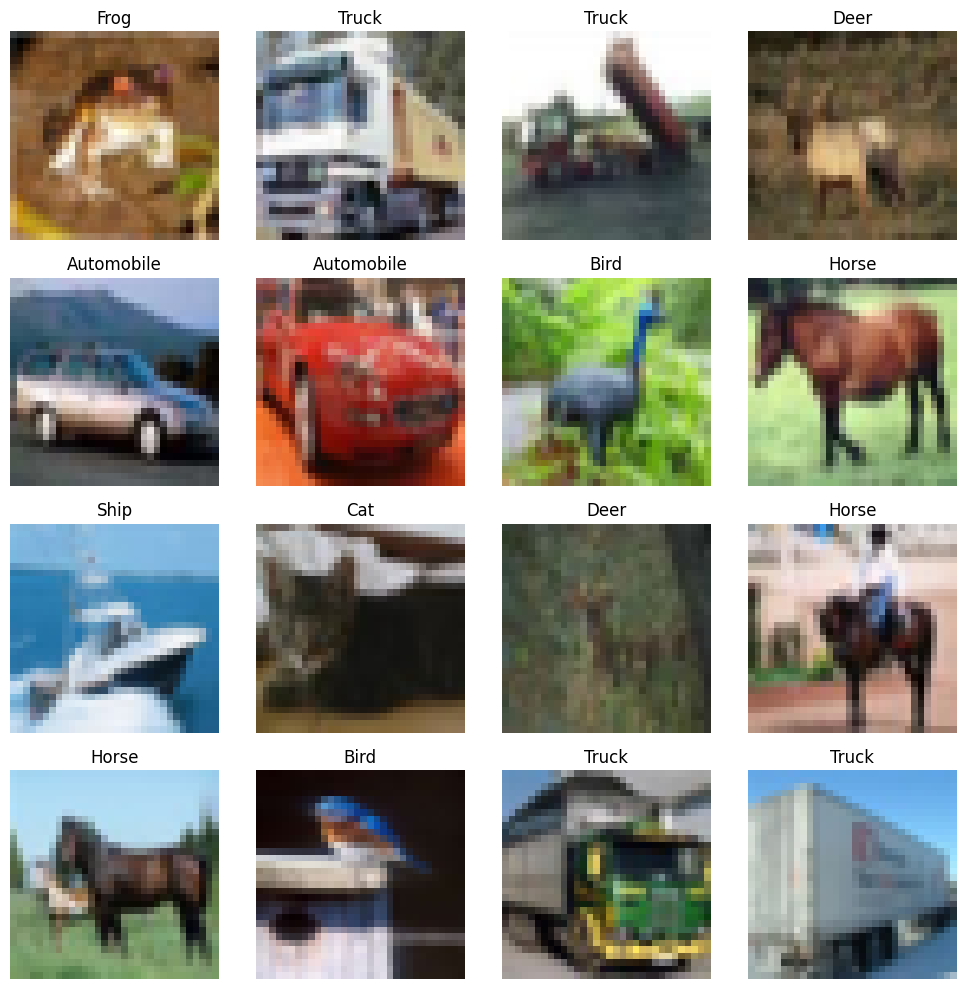

In [163]:
display_image(trainX,trainY,class_labels,16)

### FCNN Model

In [164]:
#data normalization
trainX = trainX/255.0
testX = testX/255.0

In [ ]:
trainY = trainY.reshape(-1,) #flatten the 2d array into 1d array
testY = testY.reshape(-1,)

#convert it into one-hot encoding method
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)
print(trainY[:4])
print(trainY.shape)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(50000, 10)


In [166]:
inputs = Input(shape=(32, 32, 3), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(512, activation = 'relu')(x)
Dropout(0.3)  # Dropout to prevent overfitting
x = Dense(256, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(128, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(64, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(32, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(16, activation = 'relu')(x)
Dropout(0.3) 
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,634 (6.67 MB)

 Trainable params: 1,748,634 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

### compile the model 

In [170]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(trainX, trainY, batch_size=64, epochs=10, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.2576 - loss: 2.0417 - val_accuracy: 0.3724 - val_loss: 1.7697
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.3718 - loss: 1.7343 - val_accuracy: 0.3900 - val_loss: 1.6814
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4118 - loss: 1.6292 - val_accuracy: 0.3914 - val_loss: 1.6952
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.4346 - loss: 1.5768 - val_accuracy: 0.4154 - val_loss: 1.6201
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4483 - loss: 1.5357 - val_accuracy: 0.4300 - val_loss: 1.5757
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4650 - loss: 1.4871 - val_accuracy: 0.4580 - val_loss: 1.5318
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4721 - loss: 1.4640 - val_accuracy: 0.4566 - val_loss: 1.5174
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4842 - loss: 1.4341 - 

[0.30737778544425964, 0.3831999897956848, 0.4144666790962219, 0.43755555152893066, 0.45286667346954346, 0.46575555205345154, 0.47528889775276184, 0.483599990606308, 0.4939333200454712, 0.5058666467666626]


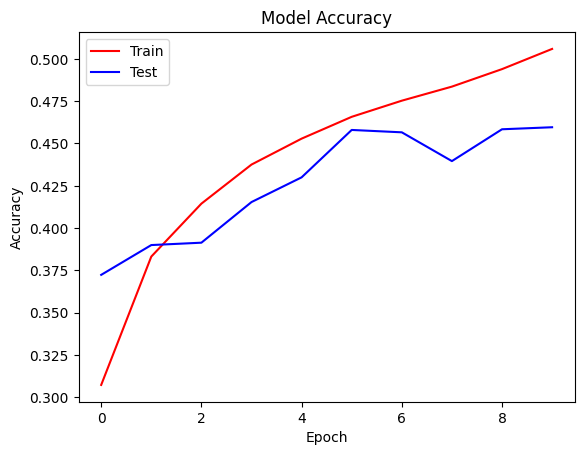

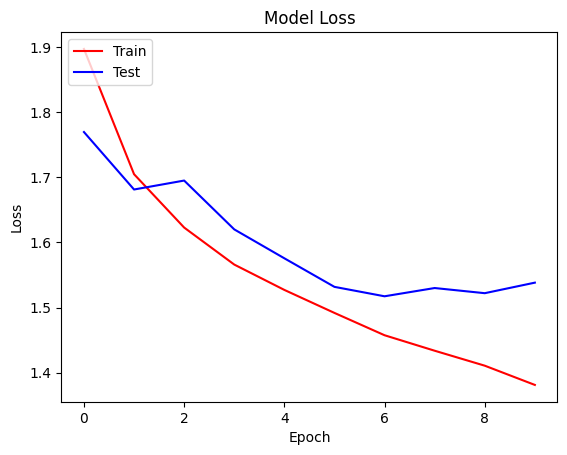

In [171]:
print(history.history['accuracy'])
# Plot training & validation accuracy
plt.plot(history.history['accuracy'],color='r')# Access training accuracy over epochs
plt.plot(history.history['val_accuracy'],color='b')# Access validation accuracy over epochs
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'],color='r')# Access loss during training
plt.plot(history.history['val_loss'],color='blue')# Access validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### evalute the model

In [172]:
# Evaluate model performance
result = model.evaluate(testX, testY)
print("Test Loss:", result[0])
print("Test Accuracy:", result[1])

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
#The np.argmax() function in NumPy is used to find the index of the maximum value

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4646 - loss: 1.5221
Test Loss: 1.5313469171524048
Test Accuracy: 0.45669999718666077
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
OriginalY   PredictedY
=========   ==========
3 		 5
8 		 9
8 		 8
0 		 8
6 		 4
6 		 5
1 		 5
6 		 6
3 		 2
1 		 1
